# Multivariable Functions: Domain and Range with SymPy

In this notebook we study the function
$$
z = f(x,y) = \sqrt{y - x^2}
$$
as a **real-valued function of two variables**.

Our goals are:

1. Determine the **domain** of $f$ (as a subset of $\mathbb{R}^2$).
2. Determine the **range** of $f$ (as a subset of $\mathbb{R}$).
3. Represent the domain and range using SymPy objects.
4. Visualize the domain region and the graph of $z=f(x,y)$.
5. Practice encoding other examples using the same pattern.


In [ ]:
# 1. Basic setup: import SymPy and configure printing

import sympy as sp
sp.init_printing(use_latex="mathjax")

# Define symbols
x, y, w = sp.symbols('x y w', real=True)
x: sp.Symbol = sp.Symbol('x', real=True)
y: sp.Symbol = sp.Symbol('y', real=True)
w: sp.Symbol = sp.Symbol('w', real=True)
assert isinstance(x, sp.Symbol)
assert isinstance(y, sp.Symbol)
assert isinstance(w, sp.Symbol)

# Define the function z = f(x,y)
f: sp.Expr = sp.sqrt(y - x**2)
assert isinstance(f, sp.Expr)
f


<class 'sympy.core.power.Pow'>


   __________
  ╱    2     
╲╱  - x  + y 

## Real-valued requirement and domain condition

For $z = \sqrt{y - x^2}$ to be real-valued, we must have
$$
y - x^2 \ge 0.
$$

This inequality defines the **domain** as a subset of $\mathbb{R}^2$:
$$
D = \{ (x,y) \in \mathbb{R}^2 : y - x^2 \ge 0 \}.
$$

We now encode this domain in SymPy as a `ConditionSet`.


In [22]:
from typing import List, Tuple

def make_domain(
    variables: Tuple[sp.Symbol],
    condition: sp.Rel, 
    ambient=None
)-> sp.ConditionSet:
    """
    Construct a SymPy ConditionSet domain.

    variables : tuple or list of SymPy symbols
    condition : SymPy relational (e.g., f(x,y) >= 0)
    ambient   : ambient space (default = ℝ^n)
    """
    variables = tuple(variables)
    n = len(variables)

    if ambient is None:
        ambient = sp.S.Reals**n

    return sp.ConditionSet(variables, condition, ambient)

# Domain: {(x,y) in R^2 : y - x^2 >= 0}
domain_D = sp.ConditionSet(
    (x, y),          # tuple of variables
    y - x**2 >= 0,   # condition
    sp.S.Reals**2       # ambient space: R^2
)

domain_D


⎧       │           2   ⎛   2        ⎞⎫
⎨(x, y) │ (x, y) ∊ ℝ  ∧ ⎝- x  + y ≥ 0⎠⎬
⎩       │                             ⎭

## Range of the function

By definition,
$$
z = \sqrt{y - x^2}.
$$

Since the square root function on $\mathbb{R}$ takes values in $[0,\infty)$ and we have enforced $y - x^2 \ge 0$, the **range** of $f$ is
$$
z(D) = \{ w \in \mathbb{R} : w \ge 0 \} = [0,\infty).
$$

We encode this range as an `Interval` in SymPy.


In [12]:
from sympy import Interval, oo

range_z = Interval(0, oo)  # [0, +∞)
range_z


[0, ∞)

## Checking points: inside vs. outside the domain

We can evaluate $f(x,y)$ at sample points to see how the real-valued condition behaves.
- If $(x,y)$ satisfies $y - x^2 \ge 0$, the value is real.
- If $(x,y)$ violates the condition, SymPy returns an imaginary value.


In [14]:
# A point in the domain: y - x^2 >= 0
val_inside = f.subs({x: 1, y: 3})   # y - x^2 = 2 >= 0
sp.simplify(val_inside)


√2

In [15]:
# A point outside the domain: y - x^2 < 0
val_outside = f.subs({x: 1, y: 0})  # y - x^2 = -1 < 0
sp.simplify(val_outside)


ⅈ

The second value is purely imaginary, which shows explicitly why the inequality
$$
y - x^2 \ge 0
$$
is necessary for $f$ to be real-valued.


## Visualizing the domain region in the $(x,y)$-plane

The domain
$$
D = \{ (x,y) : y \ge x^2 \}
$$
is the region **on or above** the parabola $y = x^2$.

We now draw this region for a bounded window, for example $x \in [-2,2]$, $y \in [-1,4]$.


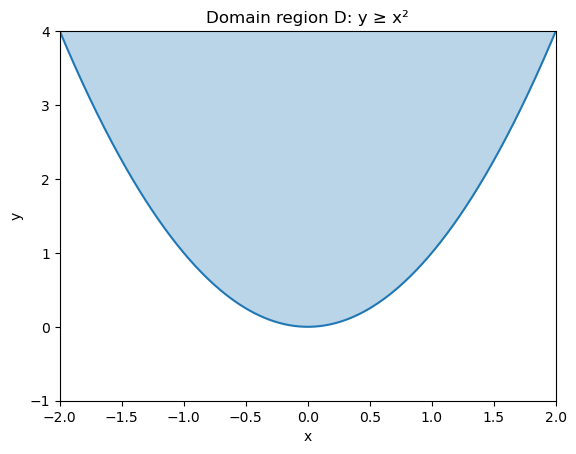

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define a rectangular window for plotting
x_min, x_max = -2.0, 2.0
y_min, y_max = -1.0, 4.0

xx = np.linspace(x_min, x_max, 400)
yy_parabola = xx**2  # y = x^2

fig, ax = plt.subplots()

# Plot the parabola y = x^2
ax.plot(xx, yy_parabola)

# Fill the region y >= x^2 inside the window
# We do this by shading between the parabola and the top of the window
ax.fill_between(
    xx,
    yy_parabola,
    y_max,
    alpha=0.3
)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Domain region D: y ≥ x²")

plt.show()


## Plotting the surface $z = \sqrt{y - x^2}$

We can also visualize the graph of the function as a surface in $(x,y,z)$-space over a restricted domain.

To avoid complex values, we restrict to a window such as $x \in [-2,2]$, $y \in [x^2, 4]$.


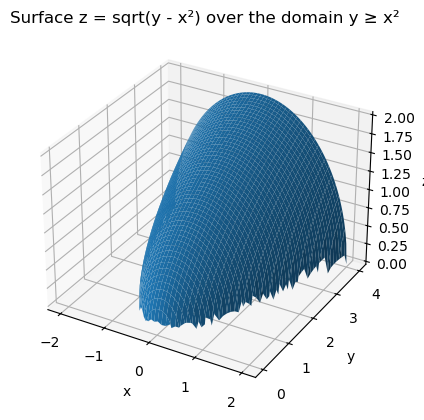

In [17]:
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

# Create a meshgrid over the domain
x_vals = np.linspace(-2, 2, 200)
y_vals = np.linspace(0, 4, 200)

X, Y = np.meshgrid(x_vals, y_vals)

# Mask values where y - x^2 < 0 to avoid invalid sqrt
mask = Y - X**2 >= 0
Z = np.zeros_like(X, dtype=float)
Z[mask] = np.sqrt(Y[mask] - X[mask]**2)
Z[~mask] = np.nan  # hide outside-domain points

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0, antialiased=True)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Surface z = sqrt(y - x²) over the domain y ≥ x²")

plt.show()


## Summary

- The function
  $$
  z = f(x,y) = \sqrt{y - x^2}
  $$
  is real-valued only when $y - x^2 \ge 0$.

- The **domain** is
  $$
  D = \{ (x,y) \in \mathbb{R}^2 : y - x^2 \ge 0 \},
  $$
  and we represented it in SymPy as a `ConditionSet`.

- The **range** is
  $$
  z(D) = [0,\infty),
  $$
  encoded as an `Interval(0, oo)`.

- Geometrically:
  - the domain is the region on or above the parabola $y = x^2$ in the $xy$-plane,
  - the graph of $z=f(x,y)$ is a surface that rises from zero along the parabola boundary.


## Exercises

1. **New example 1**

   Consider the function
   $$
   z = \sqrt{1 - x^2 - y^2}.
   $$
   (a) Determine its domain $D \subseteq \mathbb{R}^2$ by hand.  
   (b) Represent $D$ as a `ConditionSet` in SymPy.  
   (c) Plot the domain region in the $(x,y)$-plane.  
   (d) Plot the surface $z = \sqrt{1 - x^2 - y^2}$ over its domain.

2. **New example 2**

   Consider the function
   $$
   w = \ln(y - x).
   $$
   (a) Determine the condition on $(x,y)$ for which $w$ is real-valued.  
   (b) Encode the domain as a `ConditionSet`.  
   (c) Determine the range using calculus or reasoning.  
   (d) Encode the range as an `Interval` or `ConditionSet` in SymPy.

3. **Challenge: implicit domain from composition**

   Let
   $$
   f(x,y) = \sqrt{4 - (x^2 + y^2)}, \qquad
   g(x,y) = \ln(f(x,y)).
   $$
   (a) Determine the domain of $f$.  
   (b) Determine the domain of $g$.  
   (c) Represent both domains as `ConditionSet` objects in SymPy.  
   (d) Briefly explain how the domain changes when composing functions.

You can add your solutions in additional cells below each part.
